In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

In [2]:
df = pd.read_csv("traces_data - traces_data.csv")

In [3]:
df.head()

Timestamp                           traceID            spanID  \
0  2023-11-23 04:42:33  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab   
1  2023-11-23 04:42:33  d8d992638d73274d0a6710a1f9d17f93  bd0a6f75f1a901b7   
2  2023-11-23 04:42:34  fab7ab123d61c8d7d71062fc44ffb87e  fe4acd4c8a763d24   
3  2023-11-23 04:42:37  39a34f6b196aa69cdd5364bfc73b35b4  b3c68f9f4a73524b   
4  2023-11-23 04:42:40  61e0ffa4c695a832b05f406999cf319c  b204b9bce1b3ac35   

       parentSpanID         serviceName  \
0               NaN  featureflagservice   
1  0d87dcf5ea5aeaab  featureflagservice   
2               NaN      frontend-proxy   
3               NaN      frontend-proxy   
4               NaN      frontend-proxy   

                                         Name  durationNano Unnamed: 7  
0                                           /        887477        NaN  
1  featureflagservice.repo.query:featureflags        481634        NaN  
2                                     ingress        213000        NaN  
3                                     ingress        602000        NaN  
4                                     ingress        556000        NaN

In [4]:
df.isnull().sum()

Timestamp            0
traceID              0
spanID               0
parentSpanID     41781
serviceName          0
Name                 0
durationNano         0
Unnamed: 7      103117
dtype: int64

In [5]:
df = df.drop(columns='Unnamed: 7')

In [6]:
df.dtypes

Timestamp       object
traceID         object
spanID          object
parentSpanID    object
serviceName     object
Name            object
durationNano     int64
dtype: object

In [7]:
df['parentSpanID'] = df['parentSpanID'].fillna('Unknown')

In [8]:
df.isnull().sum()

Timestamp       0
traceID         0
spanID          0
parentSpanID    0
serviceName     0
Name            0
durationNano    0
dtype: int64

In [9]:
# Convert 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extracting date and time components into separate columns
df['date_column'] = df['Timestamp'].dt.date
df['time_column'] = df['Timestamp'].dt.time


In [10]:
df.dtypes

Timestamp       datetime64[ns]
traceID                 object
spanID                  object
parentSpanID            object
serviceName             object
Name                    object
durationNano             int64
date_column             object
time_column             object
dtype: object

In [11]:
df.describe()

Timestamp  durationNano
count                         183615  1.836150e+05
mean   2023-11-23 03:28:13.201389056  5.414918e+06
min              2023-11-23 02:34:49  0.000000e+00
25%              2023-11-23 03:00:05  3.357000e+05
50%              2023-11-23 03:27:34  1.584906e+06
75%              2023-11-23 03:55:32  6.832718e+06
max              2023-11-23 04:59:37  4.999858e+09
std                              NaN  2.077879e+07

In [12]:
df.columns

Index(['Timestamp', 'traceID', 'spanID', 'parentSpanID', 'serviceName', 'Name',
       'durationNano', 'date_column', 'time_column'],
      dtype='object')

# EDA Analysis

### Distribution of durationNano across method names

 This is to gain insights into how the duration of method calls varies across different method names in the dataset. By visualizing this information using a boxplot, the analysis aims to identify patterns, outliers, and potential relationships between method names and their corresponding durations. This can help in understanding the behavior and performance of different methods within the dataset, informing further investigation or decision-making processes related to optimizing code efficiency or identifying areas for improvement.

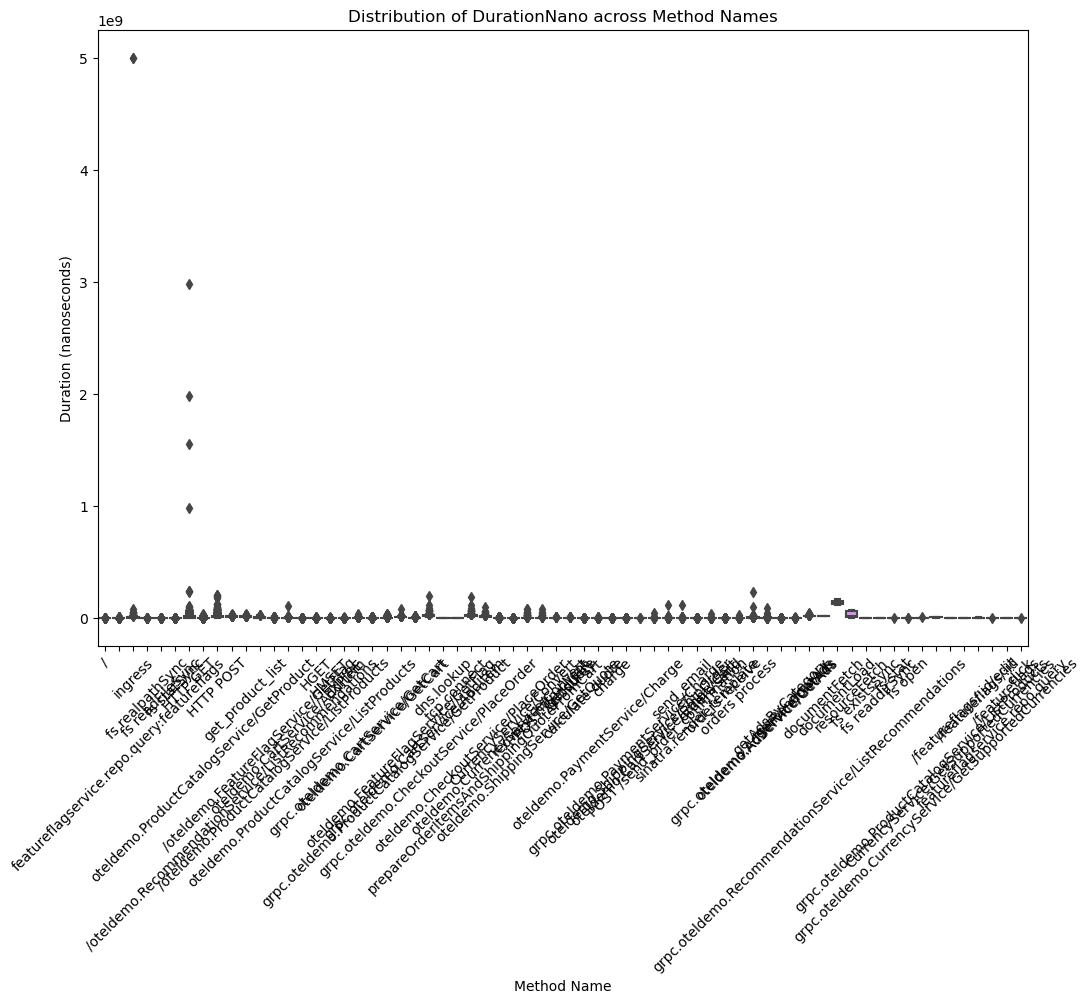

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Name', y='durationNano', data=df)
plt.title('Distribution of DurationNano across Method Names')
plt.xlabel('Method Name')
plt.ylabel('Duration (nanoseconds)')
plt.xticks(rotation=45)
plt.show()

##  Univariate Analysis
### Distribution of durationNano

This univariate analysis is to explore and understand the distribution of duration values (durationNano) in the dataset. By visualizing this information using a histogram, the analysis aims to provide insights into the frequency distribution of duration values, including measures of central tendency, spread, and any potential outliers or patterns. This analysis is crucial for gaining a comprehensive understanding of the characteristics and variability of the duration data, which can inform further investigation or decision-making processes related to performance optimization, anomaly detection, or data quality assessment.

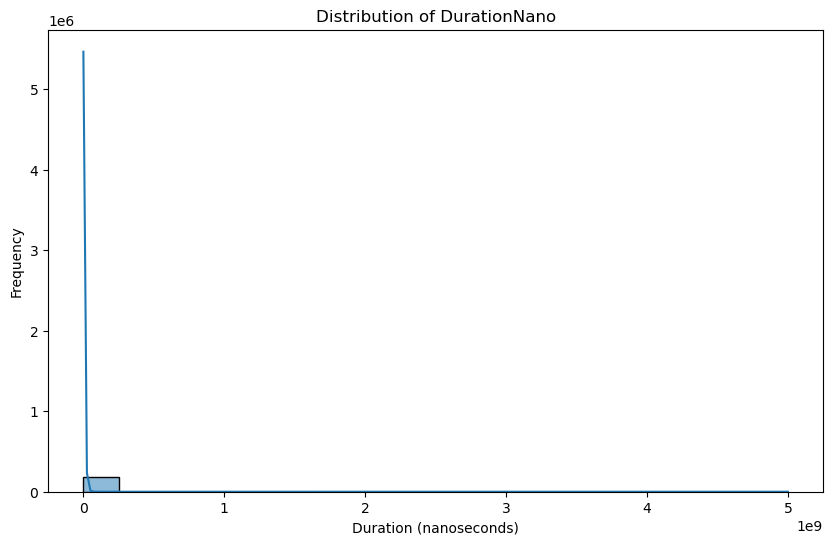

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['durationNano'], bins=20, kde=True)
plt.title('Distribution of DurationNano')
plt.xlabel('Duration (nanoseconds)')
plt.ylabel('Frequency')
plt.show()

### Frequency of serviceName

This analysis is to explore and understand the frequency distribution of service names within the dataset. By visualizing this information using a bar plot, the analysis aims to provide insights into which services occur most frequently, helping to identify usage patterns or distribution of workload across different services. Understanding the frequency of service names is crucial for various purposes, including resource allocation, performance optimization, and identifying areas of focus for further analysis or improvement.

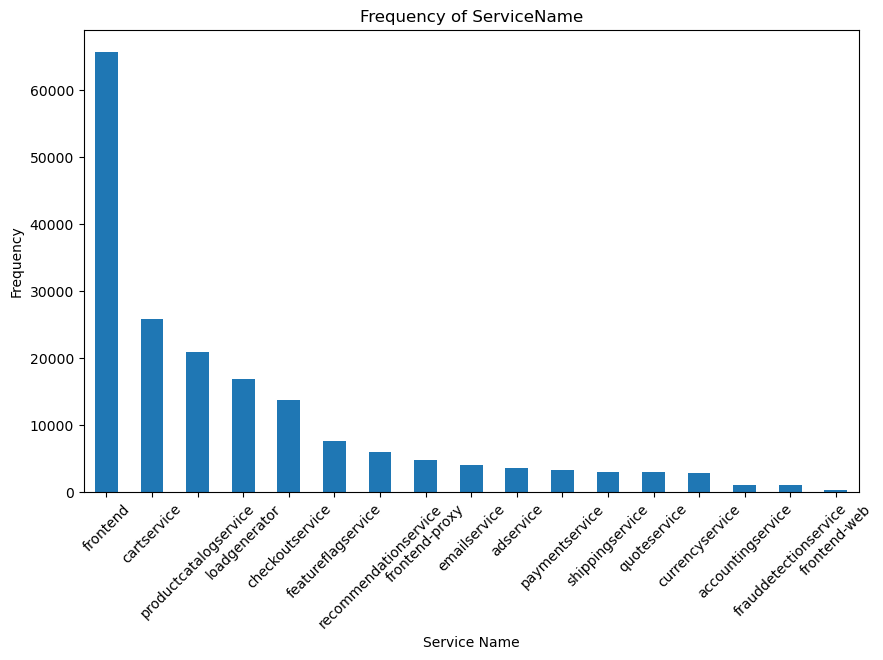

In [15]:
plt.figure(figsize=(10, 6))
df['serviceName'].value_counts().plot(kind='bar')
plt.title('Frequency of ServiceName')
plt.xlabel('Service Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Bivariate Analysis
### Relationship between durationNano and serviceName

This bivariate analysis is to explore the relationship between the duration of events (durationNano) and the service names (serviceName) within the dataset. By visualizing this information using a boxplot, the analysis aims to provide insights into how the duration varies across different services, identifying potential differences or patterns in performance. Understanding the relationship between duration and service name is essential for evaluating the efficiency and effectiveness of various services, informing decisions related to resource allocation, performance optimization, and identifying areas for improvement.

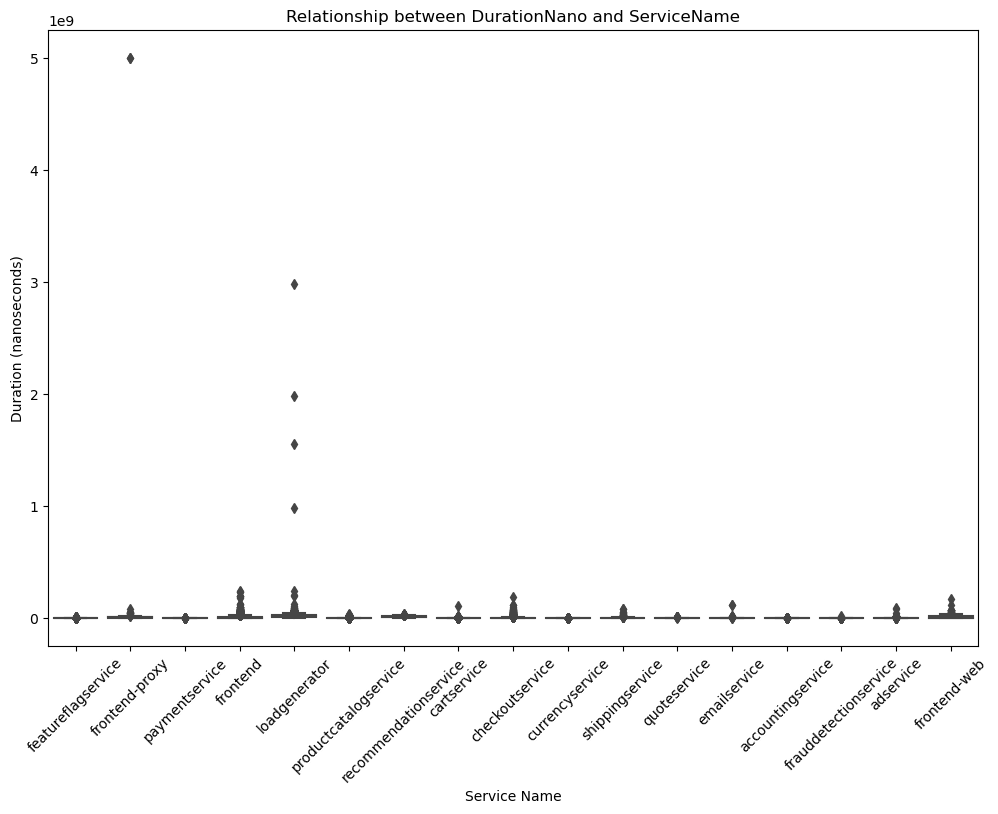

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='serviceName', y='durationNano', data=df)
plt.title('Relationship between DurationNano and ServiceName')
plt.xlabel('Service Name')
plt.ylabel('Duration (nanoseconds)')
plt.xticks(rotation=45)
plt.show()

### Relationship between durationNano and timestamp

This bivariate analysis is to explore the relationship between the duration of events (durationNano) and the timestamps at which they occurred (Timestamp). By visualizing this relationship using a scatter plot, the analysis aims to provide insights into how the duration of events changes over time. Understanding this relationship can help in identifying temporal patterns, trends, or anomalies within the dataset, which may be valuable for various purposes such as performance monitoring, trend analysis, or anomaly detection.

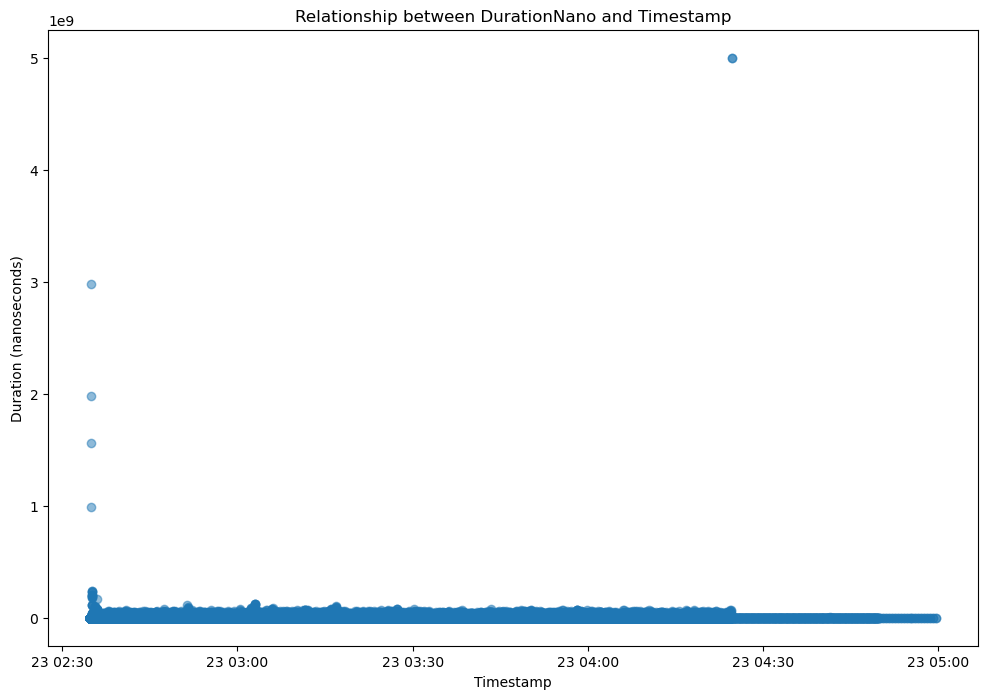

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Timestamp'], df['durationNano'], alpha=0.5)
plt.title('Relationship between DurationNano and Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Duration (nanoseconds)')
plt.show()

## Multivariate Analysis
### Relationship between durationNano, serviceName, and Name

This multivariate analysis is to explore and understand the relationship between the duration of events (durationNano), the service names (serviceName), and the method names (Name) within the dataset. By visualizing this relationship using a boxplot with multiple variables, the analysis aims to provide insights into how the duration varies across different services and methods simultaneously. Understanding this relationship is crucial for identifying potential interactions, patterns, or anomalies in performance across different combinations of services and methods, which can inform decisions related to optimization, troubleshooting, or resource allocation within the system.

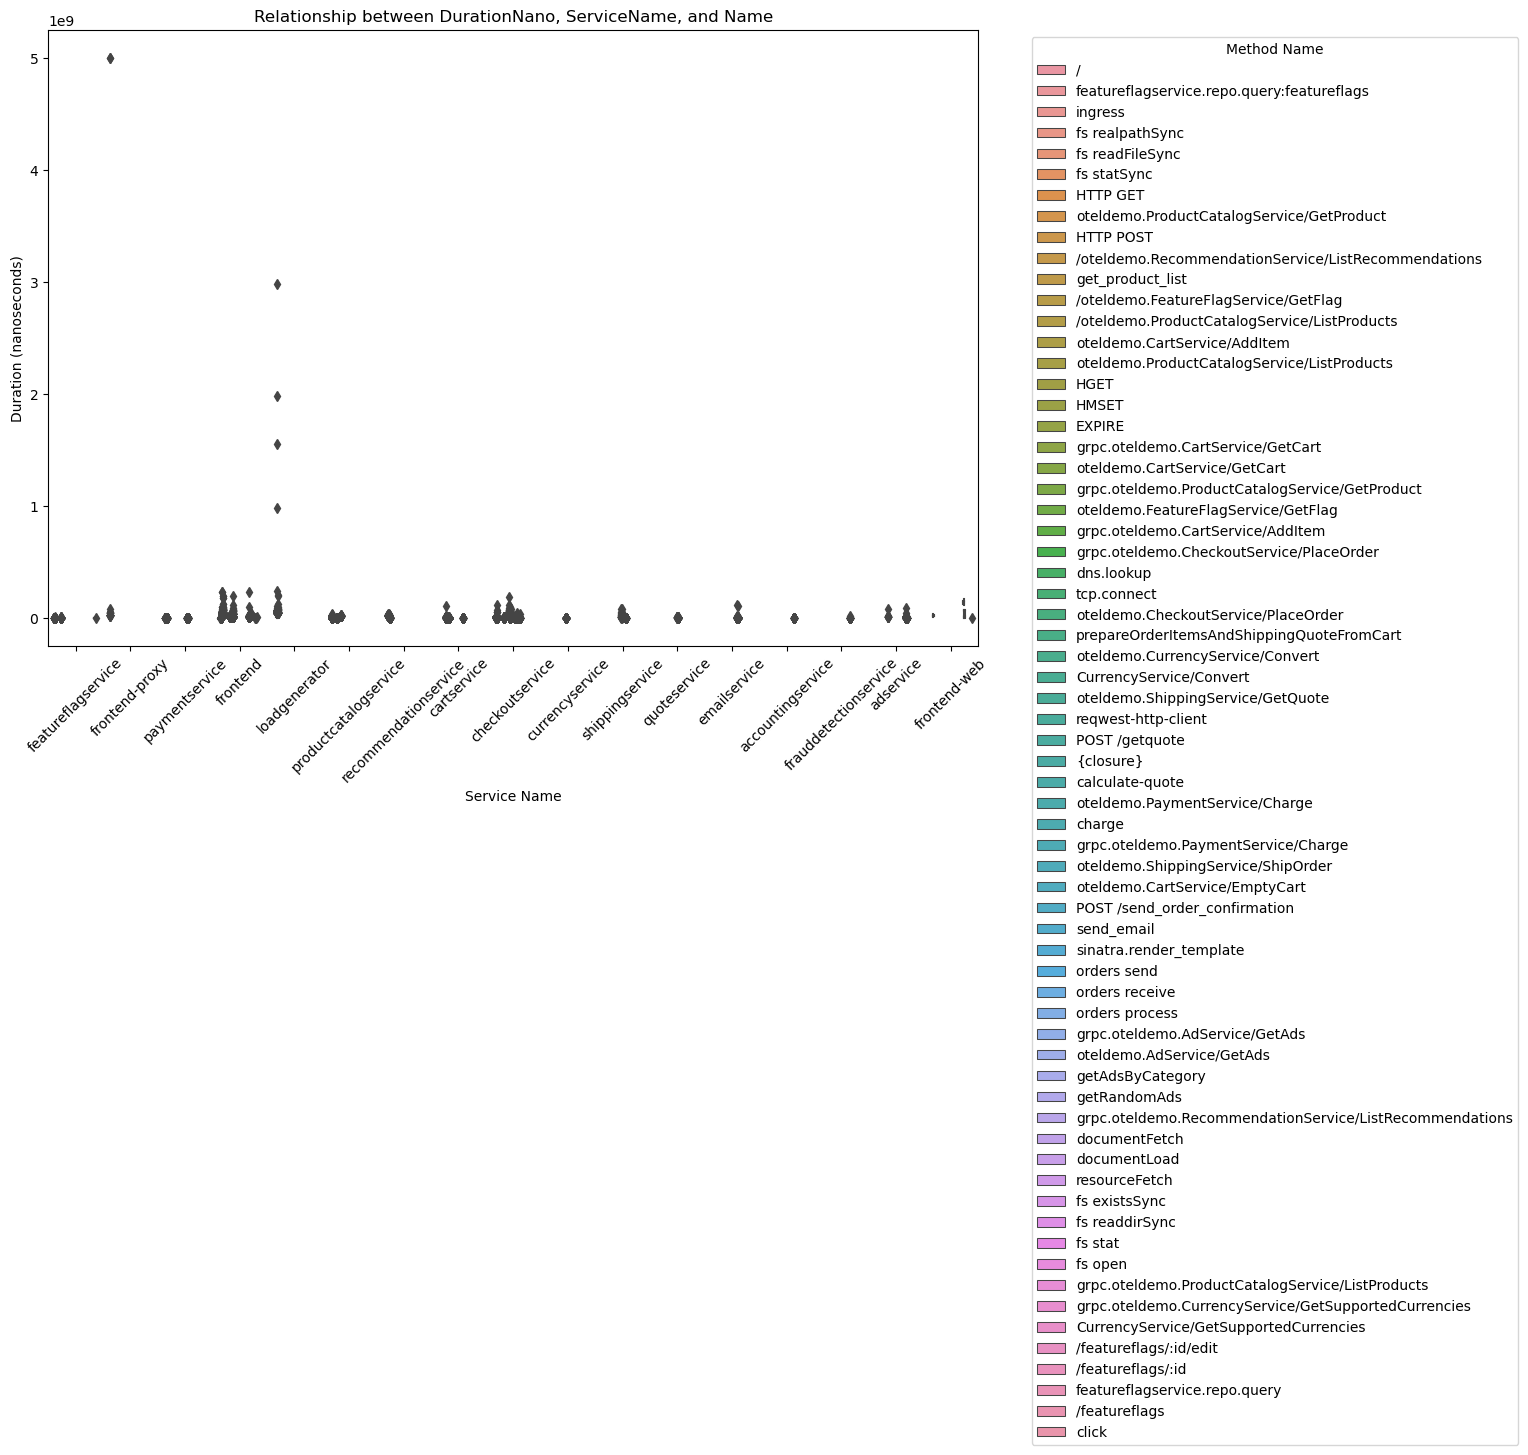

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='serviceName', y='durationNano', hue='Name', data=df)
plt.title('Relationship between DurationNano, ServiceName, and Name')
plt.xlabel('Service Name')
plt.ylabel('Duration (nanoseconds)')
plt.xticks(rotation=45)
plt.legend(title='Method Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Temporal Analysis
### Trend of durationNano over time

This temporal analysis is to explore and understand how the duration of events (durationNano) changes over time within the dataset. By visualizing this relationship using a line plot, the analysis aims to provide insights into the temporal trend of duration, revealing patterns, fluctuations, or trends over time. Understanding this temporal aspect of the data is essential for various purposes, including performance monitoring, trend analysis, or anomaly detection, enabling stakeholders to make informed decisions based on the temporal behavior of the duration data.

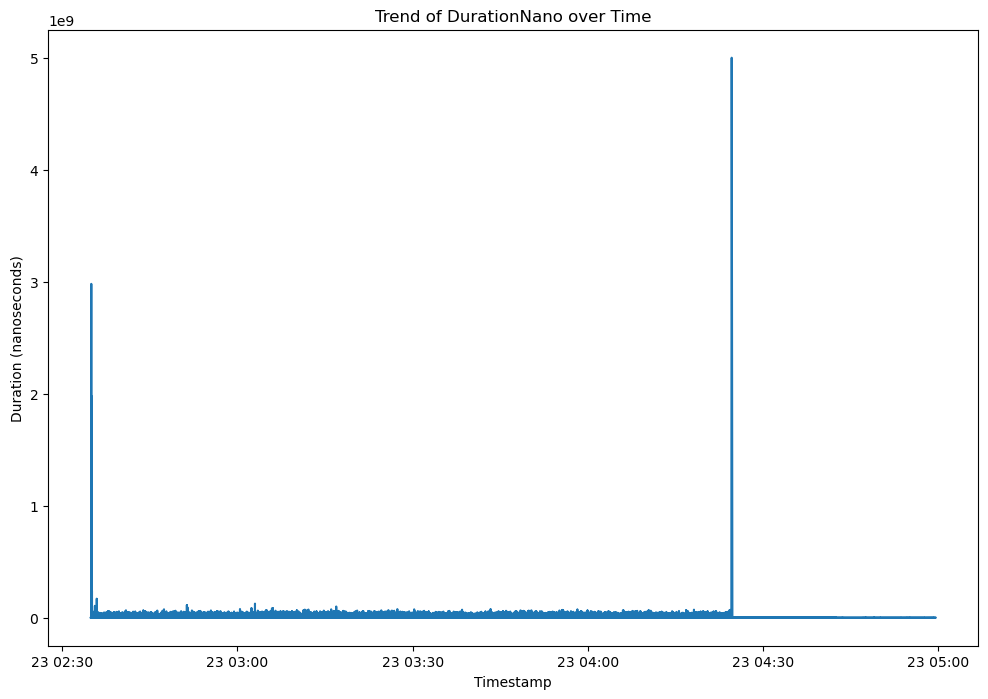

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(df['Timestamp'], df['durationNano'])
plt.title('Trend of DurationNano over Time')
plt.xlabel('Timestamp')
plt.ylabel('Duration (nanoseconds)')
plt.show()

## Distribution Analysis
### Distribution of durationNano within different categories of serviceName

This distribution analysis is to explore and understand how the duration of events (durationNano) is distributed within different service name categories (serviceName) within the dataset. By visualizing this relationship using a violin plot, the analysis aims to provide insights into the variability and distributional characteristics of duration across different services. Understanding this distribution is crucial for identifying patterns, outliers, or anomalies within the data, which can inform decisions related to performance optimization, resource allocation, or anomaly detection within the system.

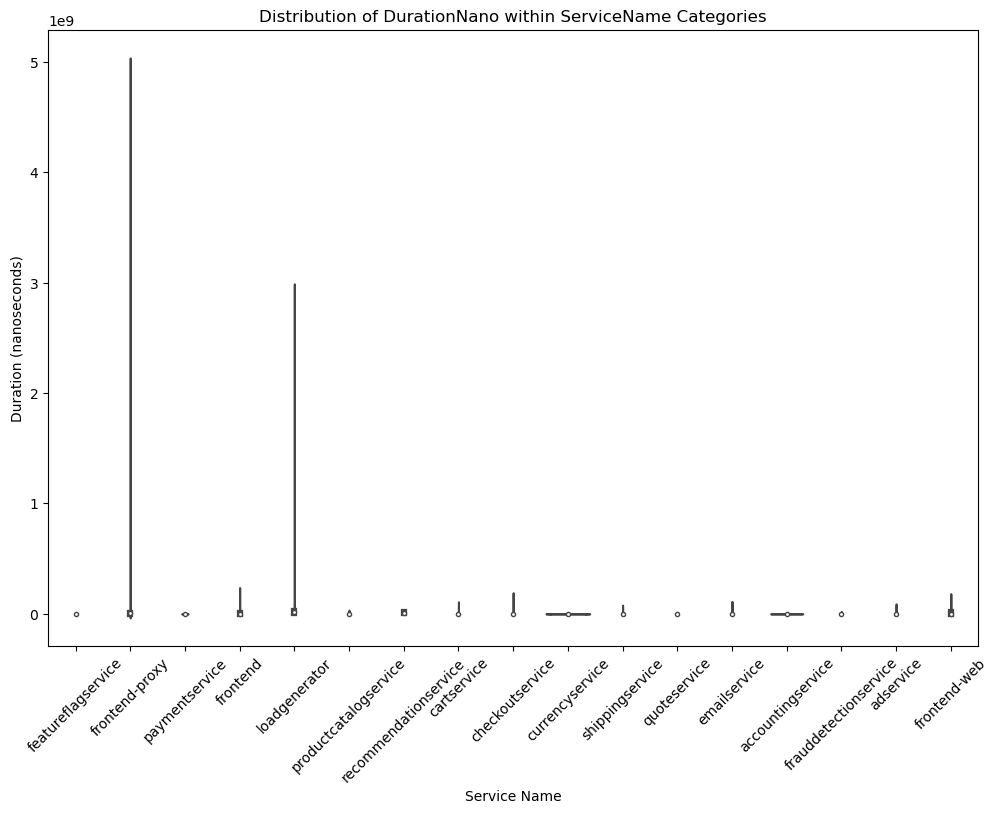

In [20]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='serviceName', y='durationNano', data=df)
plt.title('Distribution of DurationNano within ServiceName Categories')
plt.xlabel('Service Name')
plt.ylabel('Duration (nanoseconds)')
plt.xticks(rotation=45)
plt.show()

## Service-Level Analysis
### Aggregate span durations at the service level

This service level analysis is to gain insights into the average duration of events for each service within the dataset. By calculating the mean duration for each service name, the analysis aims to provide a quantitative measure of the performance of each service in terms of the time it takes to complete events. Understanding the average duration of events at the service level can help identify services that may be experiencing performance issues or bottlenecks, enabling stakeholders to prioritize optimization efforts and improve overall system efficiency and reliability.

In [21]:
service_duration = df.groupby('serviceName')['durationNano'].mean()
service_duration

serviceName
accountingservice        2.234955e+04
adservice                1.399567e+06
cartservice              6.614878e+05
checkoutservice          4.100306e+06
currencyservice          3.254905e+04
emailservice             8.898312e+05
featureflagservice       1.070550e+06
frauddetectionservice    1.515726e+05
frontend                 6.863503e+06
frontend-proxy           7.858884e+06
frontend-web             1.305869e+07
loadgenerator            1.847588e+07
paymentservice           9.378300e+04
productcatalogservice    1.673416e+06
quoteservice             6.534685e+05
recommendationservice    9.706576e+06
shippingservice          1.428734e+06
Name: durationNano, dtype: float64

## Method-Level Analysis
### Aggregate span durations at the method level
This analysis provides insights into the average execution time of individual methods or endpoints, aiding in the identification of performance bottlenecks and optimization opportunities within microservices.

In [22]:
method_duration = df.groupby('Name')['durationNano'].mean()
method_duration

Name
/                                       1.053823e+06
/featureflags                           1.411163e+06
/featureflags/:id                       2.361267e+06
/featureflags/:id/edit                  1.784988e+06
/oteldemo.FeatureFlagService/GetFlag    4.176101e+06
                                            ...     
resourceFetch                           3.148822e+07
send_email                              1.397173e+06
sinatra.render_template                 1.160193e+05
tcp.connect                             8.383147e+05
{closure}                               9.359657e+05
Name: durationNano, Length: 66, dtype: float64

## Anomaly Detection
### Placeholder for anomaly detection code based on chosen approach.
This analysis detects anomalies in span durations, aiding in the identification of potential performance issues or abnormalities within the microservice system.

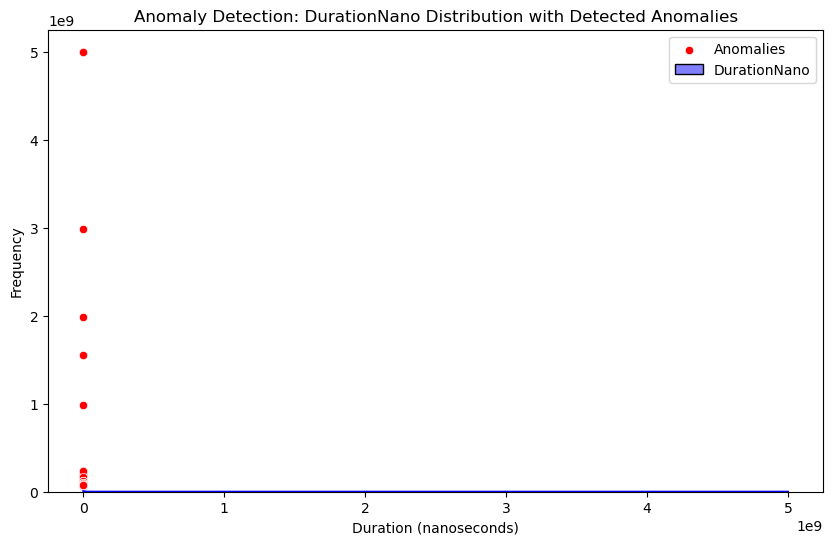

In [23]:
# Calculate Z-scores for durationNano
df['duration_zscore'] = (df['durationNano'] - df['durationNano'].mean()) / df['durationNano'].std()

# Define a threshold for anomaly detection (e.g., 3 standard deviations from the mean)
threshold = 3

# Identify anomalies based on Z-scores exceeding the threshold
anomalies = df[df['duration_zscore'].abs() > threshold]

# Plot the distribution of durationNano with detected anomalies highlighted
plt.figure(figsize=(10, 6))
sns.histplot(df['durationNano'], bins=20, kde=True, color='blue', label='DurationNano')
sns.scatterplot(x=anomalies.index, y=anomalies['durationNano'], color='red', label='Anomalies')
plt.title('Anomaly Detection: DurationNano Distribution with Detected Anomalies')
plt.xlabel('Duration (nanoseconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [24]:
# Display the detected anomalies
print("Detected Anomalies:")
anomalies

Detected Anomalies:


Timestamp                           traceID  \
3603   2023-11-23 02:34:58  0a4c8b2a204f67623bcfbda629a07fc5   
3605   2023-11-23 02:34:59  605b2ed4e56586df16602ef85673fc83   
3606   2023-11-23 02:34:59  86d69278c14a4670bb1be847e7ea5184   
3607   2023-11-23 02:35:00  7ccb42abf04c59bcf42ae9b992bcbbf9   
3615   2023-11-23 02:35:01  e05754f6b1558aaeeecd1ca6a719eba4   
...                    ...                               ...   
155533 2023-11-23 03:27:23  a90d580fce4988ac9e03043b36ab0423   
155535 2023-11-23 03:27:23  b6e6e3f2ddf279eb968df1fb39ae74e5   
160108 2023-11-23 03:30:16  fa5c0251b88a0403a3afa3c77f490d3a   
173732 2023-11-23 03:38:28  749b27e10a12f44e2f11d3cbe04d0d31   
180970 2023-11-23 03:43:21  1bf9e2ccdd0e9f199514e93baca3911e   

                  spanID      parentSpanID    serviceName       Name  \
3603    e399d5dba0602199           Unknown  loadgenerator   HTTP GET   
3605    2da5f946176ae936           Unknown  loadgenerator   HTTP GET   
3606    af231ec03fdf53f2           Unknown  loadgenerator   HTTP GET   
3607    84a19b54e2061b6e           Unknown  loadgenerator   HTTP GET   
3615    a90b8faa2b14904c           Unknown  loadgenerator  HTTP POST   
...                  ...               ...            ...        ...   
155533  76c37eb6862cf91a  b6e3bd80f2da91dc       frontend  HTTP POST   
155535  d157f2439ef49593           Unknown       frontend  HTTP POST   
160108  5f564dce5cd0b52d           Unknown  loadgenerator   HTTP GET   
173732  67e773940a0ea4eb           Unknown  loadgenerator   HTTP GET   
180970  eb374a581990319f           Unknown  loadgenerator   HTTP GET   

        durationNano date_column time_column  duration_zscore  
3603      2980831627  2023-11-23    02:34:58       143.194864  
3605      1980473681  2023-11-23    02:34:59        95.051651  
3606      1556061636  2023-11-23    02:34:59        74.626403  
3607       984197491  2023-11-23    02:35:00        47.104877  
3615       206102584  2023-11-23    02:35:01         9.658292  
...              ...         ...         ...              ...  
155533      76054272  2023-11-23    03:27:23         3.399589  
155535      74395392  2023-11-23    03:27:23         3.319753  
160108      75003187  2023-11-23    03:30:16         3.349004  
173732      70748708  2023-11-23    03:38:28         3.144253  
180970      75030902  2023-11-23    03:43:21         3.350338  

[97 rows x 10 columns]

## Pattern Recognition
### Placeholder for pattern recognition analysis.

Pattern recognition analysis helps uncover common sequences of method calls within microservice traces, aiding in the identification of recurring behavior patterns and performance bottlenecks in the system.

Frequent Method Sequences:
Sequence: ('HTTP GET', 'HTTP GET')
Count: 9848

Sequence: ('grpc.oteldemo.ProductCatalogService/GetProduct', 'HTTP GET', 'oteldemo.ProductCatalogService/GetProduct')
Count: 6457

Sequence: ('ingress',)
Count: 4678



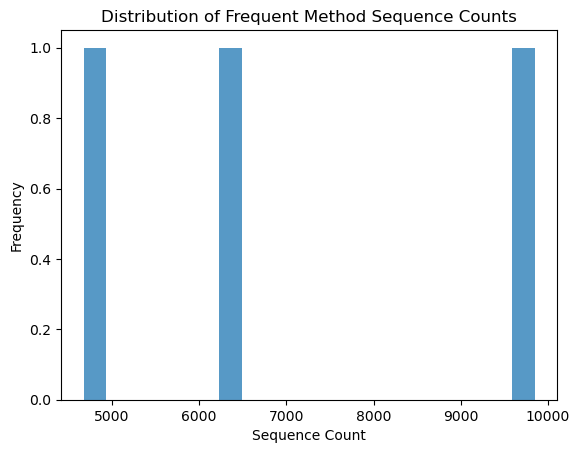

In [25]:
trace_methods = df.groupby('traceID')['Name'].apply(list)

# Define minimum support threshold for frequent sequence mining
min_support = 0.1  # Adjust as needed based on the dataset size and desired level of pattern frequency

# Count the frequency of each method sequence
method_sequence_counts = Counter(tuple(seq) for seq in trace_methods)

# Filter method sequences by support threshold
frequent_sequences = {seq: count for seq, count in method_sequence_counts.items() if count / len(trace_methods) >= min_support}

# Display frequent method sequences
print("Frequent Method Sequences:")
for seq, count in frequent_sequences.items():
    print("Sequence:", seq)
    print("Count:", count)
    print()

# Example: Plot the distribution of frequent method sequence counts
frequent_sequence_counts = list(frequent_sequences.values())
plt.hist(frequent_sequence_counts, bins=20, alpha=0.75)
plt.title('Distribution of Frequent Method Sequence Counts')
plt.xlabel('Sequence Count')
plt.ylabel('Frequency')
plt.show()

In [26]:
df.dtypes

Timestamp          datetime64[ns]
traceID                    object
spanID                     object
parentSpanID               object
serviceName                object
Name                       object
durationNano                int64
date_column                object
time_column                object
duration_zscore           float64
dtype: object

In [27]:
new_df = df.drop(columns = 'duration_zscore')

In [28]:
new_df.head()

Timestamp                           traceID            spanID  \
0 2023-11-23 04:42:33  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab   
1 2023-11-23 04:42:33  d8d992638d73274d0a6710a1f9d17f93  bd0a6f75f1a901b7   
2 2023-11-23 04:42:34  fab7ab123d61c8d7d71062fc44ffb87e  fe4acd4c8a763d24   
3 2023-11-23 04:42:37  39a34f6b196aa69cdd5364bfc73b35b4  b3c68f9f4a73524b   
4 2023-11-23 04:42:40  61e0ffa4c695a832b05f406999cf319c  b204b9bce1b3ac35   

       parentSpanID         serviceName  \
0           Unknown  featureflagservice   
1  0d87dcf5ea5aeaab  featureflagservice   
2           Unknown      frontend-proxy   
3           Unknown      frontend-proxy   
4           Unknown      frontend-proxy   

                                         Name  durationNano date_column  \
0                                           /        887477  2023-11-23   
1  featureflagservice.repo.query:featureflags        481634  2023-11-23   
2                                     ingress        213000  2023-11-23   
3                                     ingress        602000  2023-11-23   
4                                     ingress        556000  2023-11-23   

  time_column  
0    04:42:33  
1    04:42:33  
2    04:42:34  
3    04:42:37  
4    04:42:40

In [29]:
new_df['date_column'].unique()

array([datetime.date(2023, 11, 23)], dtype=object)

In [30]:
new_df['time_column'].unique()

array([datetime.time(4, 42, 33), datetime.time(4, 42, 34),
       datetime.time(4, 42, 37), ..., datetime.time(3, 44, 47),
       datetime.time(3, 44, 48), datetime.time(3, 44, 49)], dtype=object)

In [31]:
new_df['date_column'] = pd.to_datetime(new_df['date_column']) # Date format Conversion

new_df['date_month'] = pd.to_datetime(new_df['date_column']).dt.month

new_df['date_year'] = pd.to_datetime(new_df['date_column']).dt.year

In [32]:
# Extract day component from 'date_column'
new_df['date_day'] = new_df['date_column'].dt.day

In [33]:
new_df.dtypes

Timestamp       datetime64[ns]
traceID                 object
spanID                  object
parentSpanID            object
serviceName             object
Name                    object
durationNano             int64
date_column     datetime64[ns]
time_column             object
date_month               int32
date_year                int32
date_day                 int32
dtype: object

In [34]:
new_df['time_column'] = pd.to_datetime(new_df['time_column'].astype(str), format='%H:%M:%S')

In [35]:
new_df['time_hours'] = new_df['time_column'].dt.hour
new_df['time_minutes'] = new_df['time_column'].dt.minute
new_df['time_seconds'] = new_df['time_column'].dt.second

In [36]:
new_df.dtypes

Timestamp       datetime64[ns]
traceID                 object
spanID                  object
parentSpanID            object
serviceName             object
Name                    object
durationNano             int64
date_column     datetime64[ns]
time_column     datetime64[ns]
date_month               int32
date_year                int32
date_day                 int32
time_hours               int32
time_minutes             int32
time_seconds             int32
dtype: object

In [37]:
new_df = new_df.drop(columns = ['date_column', 'time_column', 'Timestamp'])

In [38]:
new_df.head()

traceID            spanID      parentSpanID  \
0  d8d992638d73274d0a6710a1f9d17f93  0d87dcf5ea5aeaab           Unknown   
1  d8d992638d73274d0a6710a1f9d17f93  bd0a6f75f1a901b7  0d87dcf5ea5aeaab   
2  fab7ab123d61c8d7d71062fc44ffb87e  fe4acd4c8a763d24           Unknown   
3  39a34f6b196aa69cdd5364bfc73b35b4  b3c68f9f4a73524b           Unknown   
4  61e0ffa4c695a832b05f406999cf319c  b204b9bce1b3ac35           Unknown   

          serviceName                                        Name  \
0  featureflagservice                                           /   
1  featureflagservice  featureflagservice.repo.query:featureflags   
2      frontend-proxy                                     ingress   
3      frontend-proxy                                     ingress   
4      frontend-proxy                                     ingress   

   durationNano  date_month  date_year  date_day  time_hours  time_minutes  \
0        887477          11       2023        23           4            42   
1        481634          11       2023        23           4            42   
2        213000          11       2023        23           4            42   
3        602000          11       2023        23           4            42   
4        556000          11       2023        23           4            42   

   time_seconds  
0            33  
1            33  
2            34  
3            37  
4            40

## Label Encoding

In [39]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for 'serviceName' column
new_df['serviceName_encoded'] = label_encoder.fit_transform(new_df['serviceName'])

# Display the mapping values
mapping_serviceName = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping values
print("\nMapping values for 'serviceName':", mapping_serviceName)


Mapping values for 'serviceName': {'accountingservice': 0, 'adservice': 1, 'cartservice': 2, 'checkoutservice': 3, 'currencyservice': 4, 'emailservice': 5, 'featureflagservice': 6, 'frauddetectionservice': 7, 'frontend': 8, 'frontend-proxy': 9, 'frontend-web': 10, 'loadgenerator': 11, 'paymentservice': 12, 'productcatalogservice': 13, 'quoteservice': 14, 'recommendationservice': 15, 'shippingservice': 16}


In [40]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for 'Name' column
new_df['Name_encoded'] = label_encoder.fit_transform(new_df['Name'])

mapping_Name = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("\nMapping values for 'Name':", mapping_Name)


Mapping values for 'Name': {'/': 0, '/featureflags': 1, '/featureflags/:id': 2, '/featureflags/:id/edit': 3, '/oteldemo.FeatureFlagService/GetFlag': 4, '/oteldemo.ProductCatalogService/ListProducts': 5, '/oteldemo.RecommendationService/ListRecommendations': 6, 'CurrencyService/Convert': 7, 'CurrencyService/GetSupportedCurrencies': 8, 'EXPIRE': 9, 'HGET': 10, 'HMSET': 11, 'HTTP GET': 12, 'HTTP POST': 13, 'POST /getquote': 14, 'POST /send_order_confirmation': 15, 'calculate-quote': 16, 'charge': 17, 'click': 18, 'dns.lookup': 19, 'documentFetch': 20, 'documentLoad': 21, 'featureflagservice.repo.query': 22, 'featureflagservice.repo.query:featureflags': 23, 'fs existsSync': 24, 'fs open': 25, 'fs readFileSync': 26, 'fs readdirSync': 27, 'fs realpathSync': 28, 'fs stat': 29, 'fs statSync': 30, 'getAdsByCategory': 31, 'getRandomAds': 32, 'get_product_list': 33, 'grpc.oteldemo.AdService/GetAds': 34, 'grpc.oteldemo.CartService/AddItem': 35, 'grpc.oteldemo.CartService/GetCart': 36, 'grpc.oteld

In [41]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for 'traceID', 'spanID', and 'parentSpanID' columns
new_df['traceID_encoded'] = label_encoder.fit_transform(new_df['traceID'])

# Display the mapping values for each column
mapping_traceID = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping values for each column
print("\nMapping values for 'traceID':", mapping_traceID)


Mapping values for 'traceID': {'000053bc079dd69baf49f27402f929d1': 0, '0000cfc6e436569ead4e41d6c21dc146': 1, '00024f57bf021b67e2daccbb809f01ba': 2, '0002e6457f1c5989b146bd39de5f6236': 3, '0005d7a764e4468834d5eca0ae2459fc': 4, '00072d382630a731ab9e71c54057ce3e': 5, '0009c84c5300c11385a84a8a90c85a49': 6, '000ce5d2b884a0d683c5dc764411c4fe': 7, '000e67ddd41e12ebd65f51eb83a7d451': 8, '0012313dbe9096773e2919ce77bfb61f': 9, '00127efd9f5686d4fbe8032c34b68fbf': 10, '0014a840edcc424ee31b3fdc84e5ecf1': 11, '0019bad498f069a001ce39320b385b24': 12, '0019d83b6a2214ac4a6e3e401b62f676': 13, '001c53025f66b2dcec30927728fb2f1f': 14, '0021913169bf99f9c04c9ffb43792af3': 15, '0021a3e0a7616242f71fadabfbb7a4af': 16, '002209a248e491441a9e18a4f8e61d55': 17, '0025061285e86a4463a0c7cc1b2a53fa': 18, '00257ba4dc846a1fee2ff0539fee58f0': 19, '0026297a05c0865948051c9b4d646001': 20, '00267195e5d396e834405e572e993311': 21, '002757d27d3bbabc4118a068b906f60f': 22, '0027e55121910b59516a6ee130618281': 23, '0027fd9a4189e787f

In [42]:
swapped_mapping1 = {value: key for key, value in mapping_traceID.items()}

# Writing swapped mapping to file
with open('mapping_traceID_swapped.txt', 'w') as file:
    for key, value in swapped_mapping1.items():
        file.write(f"{key}: {value}\n")
print("Swapped mapping values written to 'mapping_traceID_swapped.txt'")

Swapped mapping values written to 'mapping_traceID_swapped.txt'


In [43]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

new_df['spanID_encoded'] = label_encoder.fit_transform(new_df['spanID'])

mapping_spanID = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("\nMapping values for 'spanID':", mapping_spanID)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
swapped_mapping = {value: key for key, value in mapping_spanID.items()}

# Writing swapped mapping to file
with open('mapping_spanID_swapped.txt', 'w') as file:
    for key, value in swapped_mapping.items():
        file.write(f"{key}: {value}\n")
print("Swapped mapping values written to 'mapping_spanID_swapped.txt'")

Swapped mapping values written to 'mapping_spanID_swapped.txt'


In [45]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

new_df['parentSpanID_encoded'] = label_encoder.fit_transform(new_df['parentSpanID'])

mapping_parentSpanID = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("\nMapping values for 'parentSpanID':", mapping_parentSpanID)


Mapping values for 'parentSpanID': {'00014e9a5600f714': 0, '000173911b7bb335': 1, '0001eaded6f3952d': 2, '0003413ba3b983c2': 3, '0004d92877047d7e': 4, '000574124f4438a7': 5, '000578342aa82ef7': 6, '0006175ab7418a42': 7, '000641b99a554347': 8, '00066c514f2dba52': 9, '0007cbaf25a10897': 10, '00088ebf81eac2e4': 11, '00089cd3d81f3c74': 12, '000912cff2a8e805': 13, '000a45587f070519': 14, '000b42e9d7719a81': 15, '000c579ad596b582': 16, '000da4ad952bd286': 17, '000ea44ae7c352a4': 18, '000f48f00346dcbb': 19, '0012376c5f895e42': 20, '001357707f930959': 21, '001425325354e805': 22, '00146f00daa15864': 23, '00173bc93d917cc0': 24, '0017da2891b61b4e': 25, '0017e002faf62249': 26, '0018b1c9c68a7b0d': 27, '00190fc0f0b0e2c8': 28, '0019764bfc94e587': 29, '0019ba962df1221d': 30, '001a70151063959a': 31, '001b1bb687a62e6a': 32, '001b76303fc9ab4b': 33, '001bfeb6a4e6ce4a': 34, '001ca4ce073de267': 35, '001e1ede634dda89': 36, '001e6a48913162eb': 37, '001f044c8001002a': 38, '001fc25987795177': 39, '002012133564

In [46]:
swapped_mapping2 = {value: key for key, value in mapping_parentSpanID.items()}

# Writing swapped mapping to file
with open('mapping_parentspanID_swapped.txt', 'w') as file:
    for key, value in swapped_mapping2.items():
        file.write(f"{key}: {value}\n")
print("Swapped mapping values written to 'mapping_parentspanID_swapped.txt'")

Swapped mapping values written to 'mapping_parentspanID_swapped.txt'


In [47]:
new_df = new_df.drop(columns=['traceID', 'spanID', 'parentSpanID', 'serviceName', 'Name'])

In [48]:
new_df.dtypes

durationNano            int64
date_month              int32
date_year               int32
date_day                int32
time_hours              int32
time_minutes            int32
time_seconds            int32
serviceName_encoded     int64
Name_encoded            int64
traceID_encoded         int64
spanID_encoded          int64
parentSpanID_encoded    int64
dtype: object

### Box plot to visualize outliers

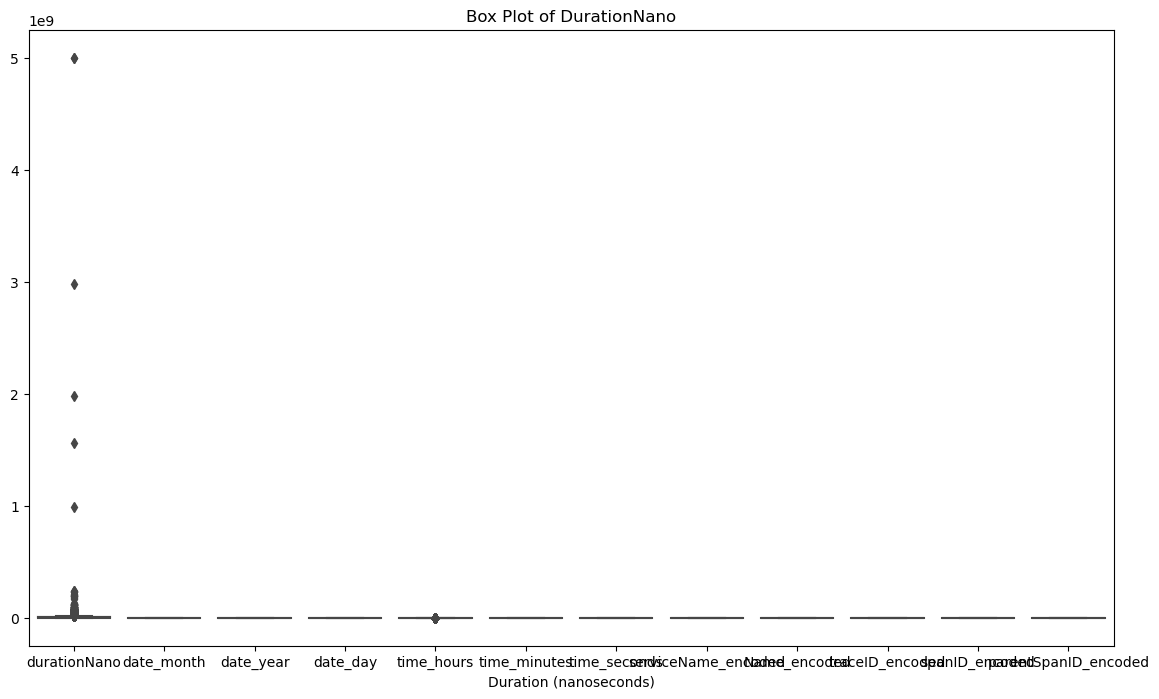

In [49]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=new_df)
plt.title('Box Plot of DurationNano')
plt.xlabel('Duration (nanoseconds)')
plt.show()

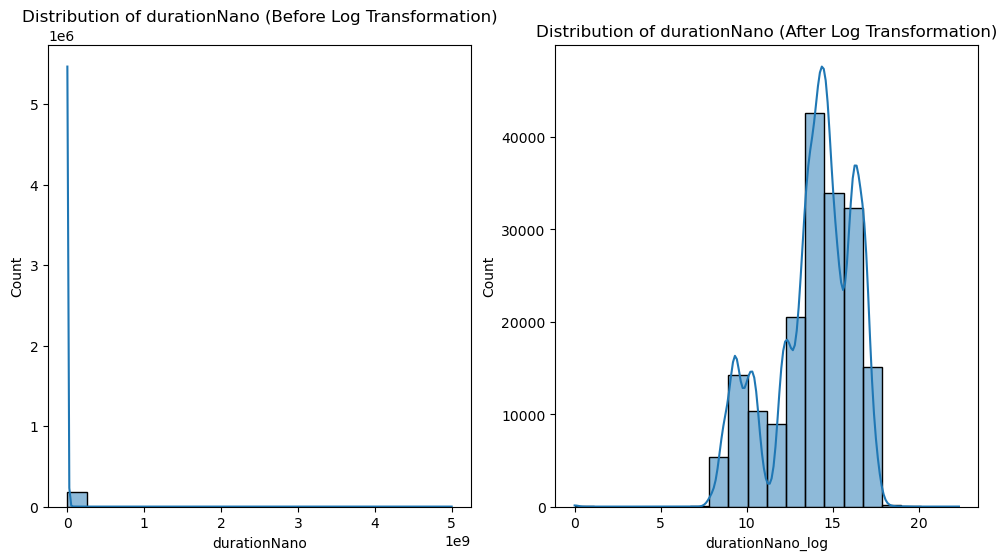

In [50]:
# Apply log transformation to 'durationNano'
new_df['durationNano_log'] = np.log1p(new_df['durationNano'])

# Plot the distribution of 'durationNano' before and after log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(new_df['durationNano'], bins=20, kde=True)
plt.title('Distribution of durationNano (Before Log Transformation)')

plt.subplot(1, 2, 2)
sns.histplot(new_df['durationNano_log'], bins=20, kde=True)
plt.title('Distribution of durationNano (After Log Transformation)')
plt.show()

In [51]:
new_df.head()

durationNano  date_month  date_year  date_day  time_hours  time_minutes  \
0        887477          11       2023        23           4            42   
1        481634          11       2023        23           4            42   
2        213000          11       2023        23           4            42   
3        602000          11       2023        23           4            42   
4        556000          11       2023        23           4            42   

   time_seconds  serviceName_encoded  Name_encoded  traceID_encoded  \
0            33                    6             0            35359   
1            33                    6            23            35359   
2            34                    9            43            40926   
3            37                    9            43             9279   
4            40                    9            43            15954   

   spanID_encoded  parentSpanID_encoded  durationNano_log  
0            9744                 67086         13.696139  
1          135737                  5685         13.084942  
2          182376                 67086         12.269052  
3          129021                 67086         13.308014  
4          127737                 67086         13.228525

In [52]:
new_df = new_df.drop(columns=['durationNano'])

In [53]:
# Define the desired column order
desired_column_order = ['date_day', 'date_month', 'date_year', 'time_hours', 'time_minutes', 'time_seconds', 'traceID_encoded', 'spanID_encoded', 'parentSpanID_encoded', 'serviceName_encoded', 'Name_encoded', 'durationNano_log']

# Reassign the DataFrame with columns in the desired order
new_df = new_df[desired_column_order]

In [54]:
new_df.head()

date_day  date_month  date_year  time_hours  time_minutes  time_seconds  \
0        23          11       2023           4            42            33   
1        23          11       2023           4            42            33   
2        23          11       2023           4            42            34   
3        23          11       2023           4            42            37   
4        23          11       2023           4            42            40   

   traceID_encoded  spanID_encoded  parentSpanID_encoded  serviceName_encoded  \
0            35359            9744                 67086                    6   
1            35359          135737                  5685                    6   
2            40926          182376                 67086                    9   
3             9279          129021                 67086                    9   
4            15954          127737                 67086                    9   

   Name_encoded  durationNano_log  
0             0         13.696139  
1            23         13.084942  
2            43         12.269052  
3            43         13.308014  
4            43         13.228525

# Feature Selection

In [55]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

## Correlation Analysis¶
### Correlation matrix

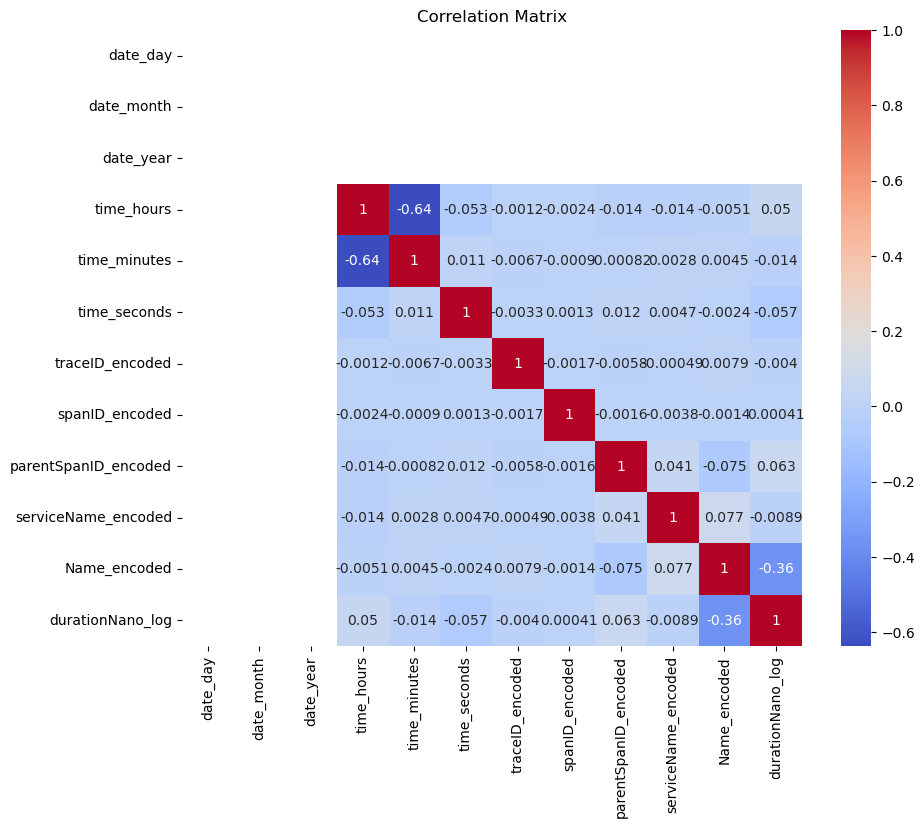

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [57]:
new_df.head()

date_day  date_month  date_year  time_hours  time_minutes  time_seconds  \
0        23          11       2023           4            42            33   
1        23          11       2023           4            42            33   
2        23          11       2023           4            42            34   
3        23          11       2023           4            42            37   
4        23          11       2023           4            42            40   

   traceID_encoded  spanID_encoded  parentSpanID_encoded  serviceName_encoded  \
0            35359            9744                 67086                    6   
1            35359          135737                  5685                    6   
2            40926          182376                 67086                    9   
3             9279          129021                 67086                    9   
4            15954          127737                 67086                    9   

   Name_encoded  durationNano_log  
0             0         13.696139  
1            23         13.084942  
2            43         12.269052  
3            43         13.308014  
4            43         13.228525

In [58]:
x = new_df.drop('durationNano_log',axis=True)

In [59]:
x

date_day  date_month  date_year  time_hours  time_minutes  \
0             23          11       2023           4            42   
1             23          11       2023           4            42   
2             23          11       2023           4            42   
3             23          11       2023           4            42   
4             23          11       2023           4            42   
...          ...         ...        ...         ...           ...   
183610        23          11       2023           3            44   
183611        23          11       2023           3            44   
183612        23          11       2023           3            44   
183613        23          11       2023           3            44   
183614        23          11       2023           3            44   

        time_seconds  traceID_encoded  spanID_encoded  parentSpanID_encoded  \
0                 33            35359            9744                 67086   
1                 33            35359          135737                  5685   
2                 34            40926          182376                 67086   
3                 37             9279          129021                 67086   
4                 40            15954          127737                 67086   
...              ...              ...             ...                   ...   
183610            52            33338          169278                 35240   
183611            54            31126            6815                 51145   
183612            54            31126          107576                 59899   
183613            54            31126          127139                 48584   
183614            54            31126          125123                 19965   

        serviceName_encoded  Name_encoded  
0                         6             0  
1                         6            23  
2                         9            43  
3                         9            43  
4                         9            43  
...                     ...           ...  
183610                   15             5  
183611                    4             7  
183612                    4             7  
183613                   14            16  
183614                    4             7  

[183615 rows x 11 columns]

In [60]:
y = new_df['durationNano_log']

In [61]:
y

0         13.696139
1         13.084942
2         12.269052
3         13.308014
4         13.228525
            ...    
183610    13.831691
183611    10.461788
183612    10.152728
183613     8.594525
183614    10.336762
Name: durationNano_log, Length: 183615, dtype: float64

In [62]:
def model_regression(x,y,algorithm):
    for i in algorithm:
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
        model = i().fit(xtrain,ytrain)
        # predict for train and test accuracy # Predicts the target variable for both the training and testing sets using the trained model
        y_train_pred = model.predict(xtrain)
        y_test_pred  = model.predict(xtest)

       # Accuracy score
        training = r2_score(ytrain,y_train_pred)
        testing = r2_score(ytest,y_test_pred)
        data = {'Algorithm':i.__name__, 'Training R2 Score':training,'Testing R2 Score':testing}
        print(data)

In [63]:
model_regression(x,y,[DecisionTreeRegressor,ExtraTreesRegressor,RandomForestRegressor,XGBRegressor])

{'Algorithm': 'DecisionTreeRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.6540138427029263}
{'Algorithm': 'ExtraTreesRegressor', 'Training R2 Score': 1.0, 'Testing R2 Score': 0.8166566495106281}
{'Algorithm': 'RandomForestRegressor', 'Training R2 Score': 0.9752862082637469, 'Testing R2 Score': 0.8199988577675453}
{'Algorithm': 'XGBRegressor', 'Training R2 Score': 0.8540948893669007, 'Testing R2 Score': 0.8372360040545999}


#### High Accuracy:
XGBRegressor consistently achieves superior accuracy compared to other regression models, making it a reliable choice for predictive tasks.
#### Robustness to Overfitting:
XGBRegressor demonstrates resilience against overfitting, maintaining a high testing accuracy while avoiding excessive reliance on training data.
#### Efficient Training: 
XGBRegressor is computationally efficient, capable of handling large datasets with ease, which facilitates faster model training and deployment.
#### Gradient Boosting: 
XGBRegressor leverages gradient boosting, a powerful ensemble learning technique that incrementally improves model performance, resulting in highly accurate predictions.
#### Tuning Flexibility: 
XGBRegressor offers a wide range of hyperparameters for fine-tuning, allowing customization to specific requirements and optimization of predictive performance.

## XGBoost Regressor

In [64]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [65]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Create XGBRegressor model
xgb = XGBRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [66]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Best Score: 0.8352385998296498


In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values,y,test_size=0.2)

model = XGBRegressor().fit(xtrain, ytrain)

y_pred_train = model.predict(xtrain) #  to predict the target variable (y) for the training set (xtrain)

y_pred_test = model.predict(xtest) # to predict the target variable for the test set (xtest)

# The r2_score function is used to calculate the R-squared (coefficient of determination) score for the training and test sets
# R-squared is a measure of how well the predicted values match the actual values

r2_train = r2_score(ytrain, y_pred_train)

r2_test = r2_score(ytest, y_pred_test)

r2_train, r2_test

(0.854561562556426, 0.8372358128709441)

In [69]:
y_pred = model.predict(xtest) 
mse = mean_squared_error(ytest, y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(ytest, y_pred) 
mae = mean_absolute_error(ytest, y_pred) 
metrics = {'R2': r2, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse} 
metrics

{'R2': 0.8372358128709441,
 'Mean Absolute Error': 0.6160121194702746,
 'Mean Squared Error': 0.8968218967158071,
 'Root Mean Squared Error': 0.9470068092235701}

In [70]:
x.values

array([[   23,    11,  2023, ..., 67086,     6,     0],
       [   23,    11,  2023, ...,  5685,     6,    23],
       [   23,    11,  2023, ..., 67086,     9,    43],
       ...,
       [   23,    11,  2023, ..., 59899,     4,     7],
       [   23,    11,  2023, ..., 48584,    14,    16],
       [   23,    11,  2023, ..., 19965,     4,     7]])

In [71]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
x1 = new_df.loc[1000]
x1.values.tolist()

[23.0,
 11.0,
 2023.0,
 2.0,
 34.0,
 49.0,
 591.0,
 178946.0,
 67086.0,
 12.0,
 30.0,
 9.011035410141815]

In [73]:
new_sample = np.array([[23.0, 11.0, 2023.0, 2.0, 34.0, 49.0, 591.0, 178946.0, 67086.0, 12.0, 30.0]])
y_pred = model.predict(new_sample) 
np.exp(y_pred[0])

9234.819

In [74]:
new_sample = np.array([[23.0, 11.0, 2023.0, 2.0, 34.0, 49.0, 591.0, 178946.0, 67086.0, 12.0, 30.0]])
y_pred = model.predict(new_sample) 
y_pred[0]

9.130736

# Save Model

In [75]:
with open("TraceData.pkl",'wb') as f:
    pickle.dump(model,f)

In [79]:
with open('TraceData.pkl', 'rb') as f:
    pick_model = pickle.load(f)

# Prediction

In [77]:
sp = [23.0, 11.0, 2023.0, 2.0, 34.0, 49.0, 591.0, 178946.0, 67086.0, 12.0, 30.0]

In [80]:
sell = pick_model.predict([sp])

In [81]:
np.exp(sell)

array([8962.917], dtype=float32)